In [1]:
import os


task_name = "navalpropulsion"
# task_name = "parkinsonstelemonitoring"
os.environ["DEEPHYPER_BENCHMARK_TASK"] = task_name
os.environ["DEEPHYPER_BENCHMARK_MOO"]  = "1"

In [2]:
import deephyper_benchmark as dhb

dhb.load("HPOBench/tabular")
from deephyper_benchmark.lib.hpobench.tabular import hpo

print(f"{hpo.DEEPHYPER_BENCHMARK_TASK=}")
print(f"{hpo.DEEPHYPER_BENCHMARK_MOO=}")

hpo.problem

hpo.DEEPHYPER_BENCHMARK_TASK='parkinsonstelemonitoring'
hpo.DEEPHYPER_BENCHMARK_MOO=True


Configuration space object:
  Hyperparameters:
    activation_fn_1, Type: Categorical, Choices: {tanh, relu}, Default: tanh
    activation_fn_2, Type: Categorical, Choices: {tanh, relu}, Default: tanh
    batch_size, Type: Ordinal, Sequence: {8, 16, 32, 64}, Default: 8
    dropout_1, Type: Ordinal, Sequence: {0.0, 0.3, 0.6}, Default: 0.0
    dropout_2, Type: Ordinal, Sequence: {0.0, 0.3, 0.6}, Default: 0.0
    init_lr, Type: Ordinal, Sequence: {0.0005, 0.001, 0.005, 0.01, 0.05, 0.1}, Default: 0.0005
    lr_schedule, Type: Categorical, Choices: {cosine, const}, Default: cosine
    n_units_1, Type: Ordinal, Sequence: {16, 32, 64, 128, 256, 512}, Default: 16
    n_units_2, Type: Ordinal, Sequence: {16, 32, 64, 128, 256, 512}, Default: 16

In [3]:
from deephyper.search.hps import CBO

max_evals = 200

In [4]:
results_default = CBO(
    hpo.problem, 
    hpo.run, 
    moo_scalarization_strategy="random",
    log_dir=f"output/hpobench/{task_name}/random",
    verbose=1,
).search(max_evals=max_evals)

results_default

/Users/romainegele/Documents/Argonne/deephyper/deephyper/evaluator/_evaluator.py:126: UserWarning: Applying nest-asyncio patch for IPython Shell!
  warnings.warn(


  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
results_random = CBO(
    hpo.problem, 
    hpo.run, 
    # objective_scaler="minmaxlog", 
    # update_prior=True, 
    # update_prior_quantile=0.25,
    surrogate_model="DUMMY",
    log_dir=f"output/hpobench/{task_name}/dummy",
    verbose=1,
).search(max_evals=max_evals)

results_random

  0%|          | 0/200 [00:00<?, ?it/s]

,p:activation_fn_1,p:activation_fn_2,p:batch_size,p:dropout_1,p:dropout_2,p:init_lr,p:lr_schedule,p:n_units_1,p:n_units_2,objective_0,objective_1,job_id,m:timestamp_submit,m:timestamp_gather,m:timestamp_start,m:timestamp_end,m:budget,m:stopped,m:objective_test,m:objective_val
0,tanh,tanh,16,0.6,0.3,0.0050,cosine,32,32,-0.081582,-66.850769,0,0.025425,0.141579,1.687441e+09,1.687441e+09,100,False,-0.077656,-0.081582
1,relu,tanh,32,0.6,0.0,0.1000,const,256,256,-1.874338,-62.716560,1,0.174316,0.303292,1.687441e+09,1.687441e+09,100,False,-1.874750,-1.874338
2,relu,relu,32,0.6,0.3,0.0050,cosine,256,16,-0.130593,-39.493156,2,0.330260,0.443869,1.687441e+09,1.687441e+09,100,False,-0.126710,-0.130593
3,relu,tanh,32,0.3,0.6,0.0050,cosine,16,512,-0.123543,-42.730186,3,0.471066,0.584987,1.687441e+09,1.687441e+09,100,False,-0.123759,-0.123543
4,tanh,relu,16,0.0,0.3,0.1000,const,64,512,-1.012437,-87.289505,4,0.612022,0.726339,1.687441e+09,1.687441e+09,100,False,-1.006051,-1.012437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,relu,tanh,32,0.6,0.0,0.0010,const,16,16,-0.169348,-32.751385,195,29.437617,29.550177,1.687441e+09,1.687441e+09,100,False,-0.161482,-0.169348
196,tanh,relu,8,0.3,0.6,0.1000,cosine,32,32,-1.008271,-130.915390,196,29.577489,29.689243,1.687441e+09,1.687441e+09,100,False,-1.002540,-1.008271
197,relu,tanh,16,0.6,0.3,0.0005,cosine,16,256,-0.242515,-70.763161,197,29.716455,29.830023,1.687441e+09,1.687441e+09,100,False,-0.236471,-0.242515
198,relu,relu,64,0.0,0.6,0.0500,const,64,64,-1.019588,-18.842190,198,29.857609,29.970822,1.687441e+09,1.687441e+09,100,False,-1.012173,-1.019588


In [ ]:
from deephyper.search.hps._mpi_doptuna import MPIDistributedOptuna

results_nsgaii = MPIDistributedOptuna(
    hpo.problem, 
    hpo.run, 
    sampler="NSGAII",
    n_objectives=2,
    log_dir=f"output/hpobench/{task_name}/nsgaii",
    verbose=1,
).search(max_evals=max_evals)

results_nsgaii


[I 2023-06-22 15:37:35,270] A new study created in memory with name: no-name-8a72b837-d1c4-4ea8-9738-e0013d320089
[I 2023-06-22 15:37:35,389] Trial 0 finished with values: [-0.00614227366168052, -35.733177185058594] and parameters: {'activation_fn_1': 'relu', 'activation_fn_2': 'relu', 'batch_size': 32, 'dropout_1': 0.0, 'dropout_2': 0.6, 'init_lr': 0.001, 'lr_schedule': 'cosine', 'n_units_1': 128, 'n_units_2': 64}. 
[I 2023-06-22 15:37:35,513] Trial 1 finished with values: [-1.3746401071548462, -127.61408996582023] and parameters: {'activation_fn_1': 'tanh', 'activation_fn_2': 'tanh', 'batch_size': 8, 'dropout_1': 0.0, 'dropout_2': 0.6, 'init_lr': 0.05, 'lr_schedule': 'const', 'n_units_1': 64, 'n_units_2': 64}. 
[I 2023-06-22 15:37:35,633] Trial 2 finished with values: [-0.02667481661774218, -78.65740966796866] and parameters: {'activation_fn_1': 'tanh', 'activation_fn_2': 'relu', 'batch_size': 16, 'dropout_1': 0.3, 'dropout_2': 0.6, 'init_lr': 0.001, 'lr_schedule': 'const', 'n_units_

,p:activation_fn_1,p:activation_fn_2,p:batch_size,p:dropout_1,p:dropout_2,p:init_lr,p:lr_schedule,p:n_units_1,p:n_units_2,objective_0,objective_1,job_id,m:timestamp_start,m:timestamp_end,m:budget,m:stopped,m:objective_test,m:objective_val
0,relu,relu,32,0.0,0.6,0.0010,cosine,128,64,-0.006142,-35.733177,0,1.687441e+09,1.687441e+09,100,False,-0.005998,-0.006142
1,tanh,tanh,8,0.0,0.6,0.0500,const,64,64,-1.374640,-127.614090,1,1.687441e+09,1.687441e+09,100,False,-1.363177,-1.374640
2,tanh,relu,16,0.3,0.6,0.0010,const,64,256,-0.026675,-78.657410,2,1.687441e+09,1.687441e+09,100,False,-0.027108,-0.026675
3,relu,tanh,16,0.6,0.3,0.0005,const,512,256,-0.067571,-155.458954,3,1.687441e+09,1.687441e+09,100,False,-0.068365,-0.067571
4,tanh,tanh,32,0.3,0.3,0.0050,const,16,16,-0.092730,-33.348484,4,1.687441e+09,1.687441e+09,100,False,-0.091669,-0.092730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,relu,relu,64,0.3,0.6,0.0005,const,16,64,-0.124411,-19.075066,195,1.687441e+09,1.687441e+09,100,False,-0.121970,-0.124411
196,relu,relu,32,0.0,0.3,0.0010,cosine,128,512,-0.000183,-61.142433,196,1.687441e+09,1.687441e+09,100,False,-0.000168,-0.000183
197,relu,relu,64,0.0,0.0,0.0010,cosine,128,128,-0.000159,-20.553204,197,1.687441e+09,1.687441e+09,100,False,-0.000156,-0.000159
198,tanh,tanh,64,0.0,0.0,0.0050,const,128,128,-0.006831,-20.429466,198,1.687441e+09,1.687441e+09,100,False,-0.007004,-0.006831


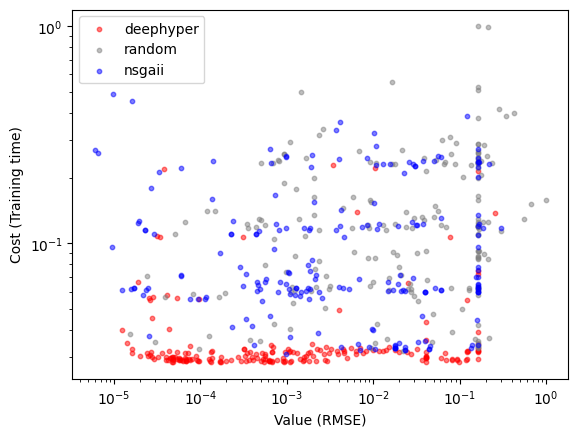

In [ ]:
import matplotlib.pyplot as plt


max_objective_0 = max(
    results_default["objective_0"].abs().max(),
    results_random["objective_0"].abs().max())
max_objective_1 = max(
    results_default["objective_1"].abs().max(), 
    results_random["objective_1"].abs().max(),
)

plt.figure()
plt.scatter(
    -results_default["objective_0"]/max_objective_0,
    -results_default["objective_1"]/max_objective_1,
    label="deephyper",
    s=10,
    alpha=0.5,
    c="r",
)
plt.scatter(
    -results_random["objective_0"]/max_objective_0,
    -results_random["objective_1"]/max_objective_1,
    label="random",
    s=10,
    alpha=0.5,
    c="gray",
)

plt.scatter(
    -results_nsgaii["objective_0"]/max_objective_0,
    -results_nsgaii["objective_1"]/max_objective_1,
    label="nsgaii",
    s=10,
    alpha=0.5,
    c="b",
)


plt.xlabel("Value (RMSE)")
plt.ylabel("Cost (Training time)")
plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.savefig(f"output/hpobench/{task_name}/scatter.png")
plt.show()